In [1]:
import labelme
import tensorflow as tf
import cv2
import matplotlib
import albumentations


In [2]:
import os
import time
import uuid

In [4]:
IMAGES_PATH = os.path.join('data','images')
number_images = 100

In [5]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
!pip install labelme

In [7]:
!labelme

2024-08-05 17:04:11,442 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Aayush\.labelmerc
qt.qpa.fonts: Unable to open default EUDC font: "EUDC.TTE"


In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [11]:
tf.config.list_physical_devices('GPU')

[]

In [12]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [13]:
images.as_numpy_iterator().next()

b'data\\images\\7ff5bc7e-531e-11ef-9d24-cc6b1e41bfea.jpg'

In [14]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [15]:
images = images.map(load_image)

In [16]:
images.as_numpy_iterator().next()

array([[[171, 180, 189],
        [173, 183, 192],
        [166, 179, 188],
        ...,
        [199, 211, 189],
        [199, 213, 188],
        [200, 214, 189]],

       [[174, 183, 190],
        [170, 180, 189],
        [164, 177, 185],
        ...,
        [198, 210, 190],
        [197, 211, 188],
        [198, 212, 189]],

       [[171, 182, 186],
        [170, 184, 187],
        [165, 180, 185],
        ...,
        [198, 209, 192],
        [197, 210, 192],
        [198, 211, 193]],

       ...,

       [[ 43, 111,  72],
        [ 44, 112,  71],
        [ 49, 118,  74],
        ...,
        [152, 153, 147],
        [151, 152, 146],
        [151, 152, 146]],

       [[ 41, 111,  75],
        [ 41, 111,  74],
        [ 48, 116,  77],
        ...,
        [151, 152, 146],
        [151, 152, 147],
        [152, 153, 148]],

       [[ 43, 114,  80],
        [ 41, 113,  76],
        [ 47, 115,  78],
        ...,
        [150, 151, 145],
        [151, 152, 147],
        [152, 153, 148]]

In [17]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [18]:
image_generator = images.batch(4).as_numpy_iterator()

In [19]:
plot_images = image_generator.next()

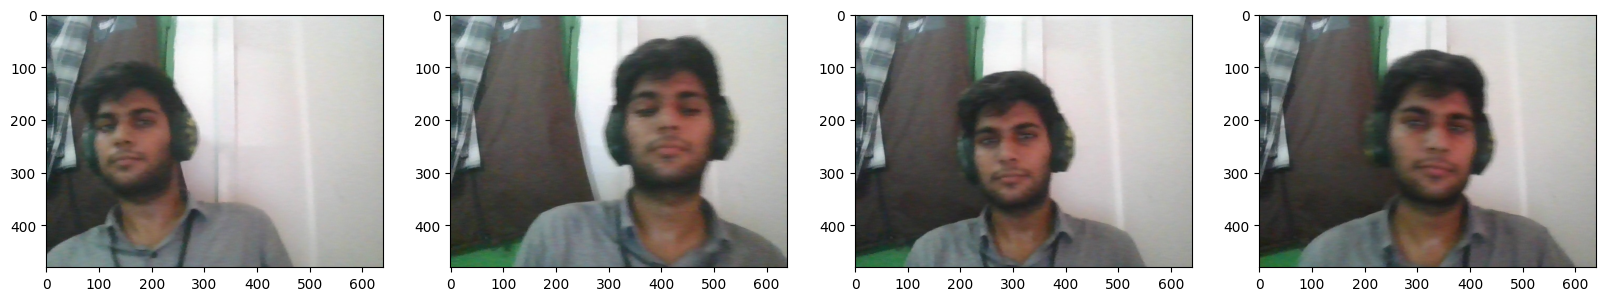

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [21]:
100*.7 # 70 to train

70.0

In [22]:
100*.15 # 15 to test and val

15.0

In [23]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

In [4]:
import albumentations as alb

In [25]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [26]:
img = cv2.imread(os.path.join('data','train', 'images','a4353e1e-522f-11ef-bde4-cc6b1e41bfea.jpg'))

In [27]:
img

array([[[ 67,  53,  24],
        [ 64,  53,  23],
        [ 63,  50,  24],
        ...,
        [147, 142, 121],
        [150, 142, 119],
        [151, 143, 120]],

       [[ 65,  51,  22],
        [ 62,  50,  22],
        [ 61,  50,  23],
        ...,
        [147, 142, 121],
        [148, 142, 119],
        [150, 142, 119]],

       [[ 61,  49,  21],
        [ 60,  48,  20],
        [ 59,  48,  21],
        ...,
        [147, 142, 121],
        [148, 142, 119],
        [148, 142, 119]],

       ...,

       [[ 20,  24,  12],
        [ 20,  24,  12],
        [ 20,  24,  13],
        ...,
        [103, 100,  79],
        [106, 101,  80],
        [107, 102,  81]],

       [[ 18,  24,  13],
        [ 18,  24,  13],
        [ 18,  24,  13],
        ...,
        [103,  97,  78],
        [105,  98,  78],
        [106,  99,  79]],

       [[ 18,  24,  13],
        [ 18,  24,  13],
        [ 18,  24,  13],
        ...,
        [102,  96,  77],
        [103,  96,  76],
        [103,  96,  76]]

In [28]:
with open(os.path.join('data', 'train', 'labels', 'a4353e1e-522f-11ef-bde4-cc6b1e41bfea.json'), 'r') as f:
    label = json.load(f)

In [29]:
label

{'version': '5.5.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[170.53191489361706, 100.63829787234044],
    [533.2978723404254, 470.3191489361702]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\a4353e1e-522f-11ef-bde4-cc6b1e41bfea.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVY

In [30]:
label['shapes'][0]['points']

[[170.53191489361706, 100.63829787234044],
 [533.2978723404254, 470.3191489361702]]

In [31]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [32]:
coords

[170.53191489361706, 100.63829787234044, 533.2978723404254, 470.3191489361702]

In [33]:
coords = list(np.divide(coords, [640,480,640,480]))

In [34]:
coords

[0.26645611702127664,
 0.20966312056737593,
 0.8332779255319147,
 0.979831560283688]

In [35]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [36]:
augmented['bboxes'][0][2:]

(1.0, 0.8274704491725768)

In [37]:
augmented['bboxes']

[(0.24340425531914903, 0.005957446808510625, 1.0, 0.8274704491725768)]

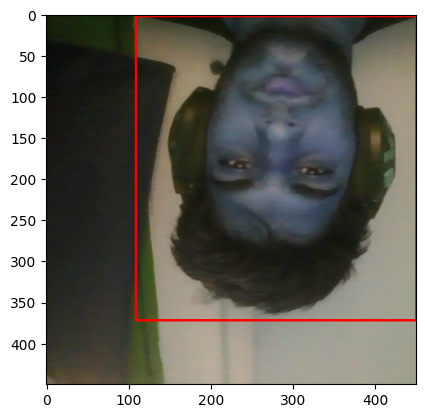

In [38]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [39]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(240):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.19414893617021278, 0.19968971631205676, 0.0013297872340425564, 0.9831560283687943, 'face'].
x_max is less than or equal to x_min for bbox [0.5997340425531915, 0.35483156028368795, 0.1182503570513056, 0.9979166666666666, 'face'].
y_max is less than or equal to y_min for bbox [0.7659574468085106, 0.7903368794326241, 0.9984375, 0.003225842198581101, 'face'].
x_max is less than or equal to x_min for bbox [0.31549202127659576, 0.06892730496453907, 4.4408920985006264e-17, 0.8045247577141585, 'face'].
x_max is less than or equal to x_min for bbox [0.2107712765957447, 0.25620567375886527, 0.0, 0.8931309729182072, 'face'].
x_max is less than or equal to x_min for bbox [0.3986037234042553, 0.030141843971631256, 0.0, 0.8798469977322297, 'face'].
x_max is less than or equal to x_min for bbox [0.5457114361702128, 0.1409574468085107, 0.1509308510638298, 0.8922872340425533, 'face'].
x_max is less than or equal to x_min for bbox [0.33876329787234044, 0.

In [5]:
import tensorflow as tf

In [41]:
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image

In [42]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [43]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [44]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [45]:
train_images.as_numpy_iterator().next()

array([[[0.96770835, 0.86329657, 0.8985907 ],
        [0.97156864, 0.87107843, 0.90588236],
        [0.9594976 , 0.87714463, 0.9045956 ],
        ...,
        [0.5637255 , 0.5127451 , 0.5862745 ],
        [0.56550246, 0.53137255, 0.59375   ],
        [0.58204657, 0.54626226, 0.60606617]],

       [[0.9683211 , 0.8663603 , 0.9016544 ],
        [0.96727943, 0.8666054 , 0.9014706 ],
        [0.96433824, 0.87395835, 0.90539217],
        ...,
        [0.5568628 , 0.5063726 , 0.58480394],
        [0.5504289 , 0.5136642 , 0.5965074 ],
        [0.5495098 , 0.5183211 , 0.58596814]],

       [[0.96813726, 0.8661765 , 0.9014706 ],
        [0.96819854, 0.86623776, 0.9015319 ],
        [0.96862745, 0.8666667 , 0.9019608 ],
        ...,
        [0.5367034 , 0.4935662 , 0.5563725 ],
        [0.5495711 , 0.5072917 , 0.57438725],
        [0.5450368 , 0.5175858 , 0.5803309 ]],

       ...,

       [[0.7398897 , 0.63547796, 0.6521446 ],
        [0.74417895, 0.6304534 , 0.6451593 ],
        [0.7416054 , 0

In [46]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [47]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [48]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [49]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [50]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3035, 0.2703, 0.8   , 0.924 ], dtype=float16))

In [51]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(26160, 26160, 6000, 6000, 5280, 5280)

In [52]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [53]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [54]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [55]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.05026, 0.     , 0.6294 , 0.7295 ],
        [0.     , 0.0581 , 0.03622, 0.7656 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.91   , 0.2264 , 1.     , 1.     ],
        [0.3    , 0.1989 , 0.7856 , 0.8774 ],
        [0.4001 , 0.06058, 0.8965 , 0.7144 ],
        [0.1935 , 0.286  , 0.69   , 0.9395 ],
        [0.99   , 0.2522 , 1.     , 0.9595 ]], dtype=float16))

In [56]:
data_samples = train.as_numpy_iterator()

In [57]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


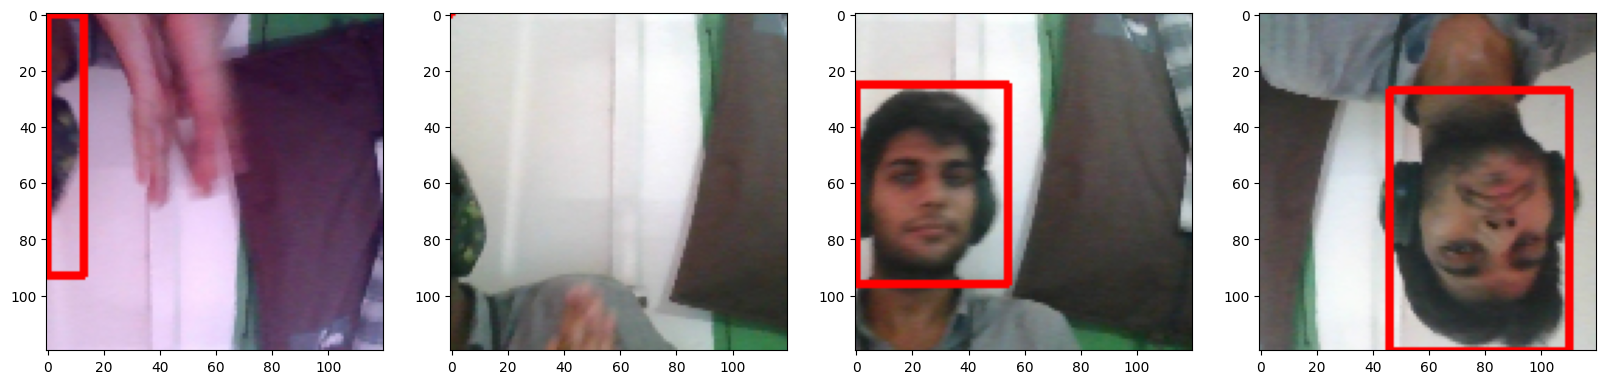

In [58]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx in range(4): 
    sample_image = res[0][idx].copy()  # Make a writable copy of the image
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                  (255,0,0), 2)

    ax[idx].imshow(sample_image)
plt.show()

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [60]:
vgg = VGG16(include_top=False)

In [61]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [62]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [63]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.681  , 0.1687 , 1.     , 0.9473 ],
        [0.966  , 0.2773 , 1.     , 0.9727 ],
        [0.207  , 0.1345 , 0.8193 , 0.7896 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.2612 , 0.10956, 0.7705 , 0.7715 ],
        [0.0164 , 0.1426 , 0.5024 , 0.8213 ],
        [0.3157 , 0.1989 , 0.727  , 0.745  ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

In [64]:
facetracker = build_model()

In [65]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [66]:
X, y = train.as_numpy_iterator().next()

In [67]:
X.shape

(8, 120, 120, 3)

In [68]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 2s 2s/step


In [69]:
classes, coords

(array([[0.4388908 ],
        [0.4498866 ],
        [0.3902235 ],
        [0.36169788],
        [0.40537176],
        [0.42385605],
        [0.49118003],
        [0.44700354]], dtype=float32),
 array([[0.6383724 , 0.40581182, 0.6468793 , 0.6949632 ],
        [0.5502874 , 0.44801   , 0.5853181 , 0.7030135 ],
        [0.52305907, 0.40551233, 0.51892537, 0.7110317 ],
        [0.526818  , 0.48688096, 0.5540553 , 0.7400138 ],
        [0.5703962 , 0.43967023, 0.5068582 , 0.59050584],
        [0.64447844, 0.41193953, 0.61771923, 0.6618457 ],
        [0.53835994, 0.43877554, 0.60814893, 0.67486393],
        [0.59601015, 0.3619521 , 0.62740344, 0.6947634 ]], dtype=float32))

In [70]:
len(train)

3270

In [6]:
import tensorflow as tf

In [72]:
batches_per_epoch = len(train)
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=batches_per_epoch,
    decay_rate=1/0.75 - 1,
    staircase=True
)

In [73]:
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [74]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [75]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [76]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.5609045>

In [77]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.80931973>

In [78]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.5609045>

In [79]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [80]:
model = FaceTracker(facetracker)

In [81]:
model.compile(opt, classloss, regressloss)

In [82]:
logdir='logs'

In [83]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [85]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
3270/3270 [==============================] - 10533s 3s/step - total_loss: 0.1080 - class_loss: 0.0288 - regress_loss: 0.0937 - val_total_loss: 0.2974 - val_class_loss: 0.0619 - val_regress_loss: 0.2665
Epoch 2/10
3270/3270 [==============================] - 11079s 3s/step - total_loss: 0.0673 - class_loss: 0.0179 - regress_loss: 0.0583 - val_total_loss: 0.0573 - val_class_loss: 2.3285e-05 - val_regress_loss: 0.0573
Epoch 3/10
3270/3270 [==============================] - 12432s 4s/step - total_loss: 0.0510 - class_loss: 0.0132 - regress_loss: 0.0444 - val_total_loss: 0.0717 - val_class_loss: 4.9343e-04 - val_regress_loss: 0.0715
Epoch 4/10
3270/3270 [==============================] - 9881s 3s/step - total_loss: 0.0451 - class_loss: 0.0115 - regress_loss: 0.0393 - val_total_loss: 0.0745 - val_class_loss: 1.0803e-06 - val_regress_loss: 0.0745
Epoch 5/10
3270/3270 [==============================] - 10419s 3s/step - total_loss: 0.0431 - class_loss: 0.0108 - regress_loss: 0.0377 -

In [86]:
hist.history

{'total_loss': [0.02401069365441799,
  0.039638955146074295,
  0.01593141071498394,
  0.006934285629540682,
  0.02373097836971283,
  0.05278927832841873,
  0.024297136813402176,
  0.03422672674059868,
  0.028578637167811394,
  0.06748954951763153],
 'class_loss': [0.006623671390116215,
  0.007026378531008959,
  0.0013897864846512675,
  4.111673479201272e-05,
  4.530724254436791e-05,
  0.0027399940881878138,
  0.008960364386439323,
  7.97235406935215e-06,
  5.833919658471132e-06,
  0.01698320358991623],
 'regress_loss': [0.02069885842502117,
  0.03612576425075531,
  0.015236517414450645,
  0.0069137271493673325,
  0.023708324879407883,
  0.05141928046941757,
  0.01981695368885994,
  0.034222740679979324,
  0.028575720265507698,
  0.058997951447963715],
 'val_total_loss': [0.297415554523468,
  0.05727840214967728,
  0.0717109963297844,
  0.07453537732362747,
  0.04983629286289215,
  1.5319384336471558,
  0.0931944027543068,
  0.07501722872257233,
  0.04572777822613716,
  0.08252296596765

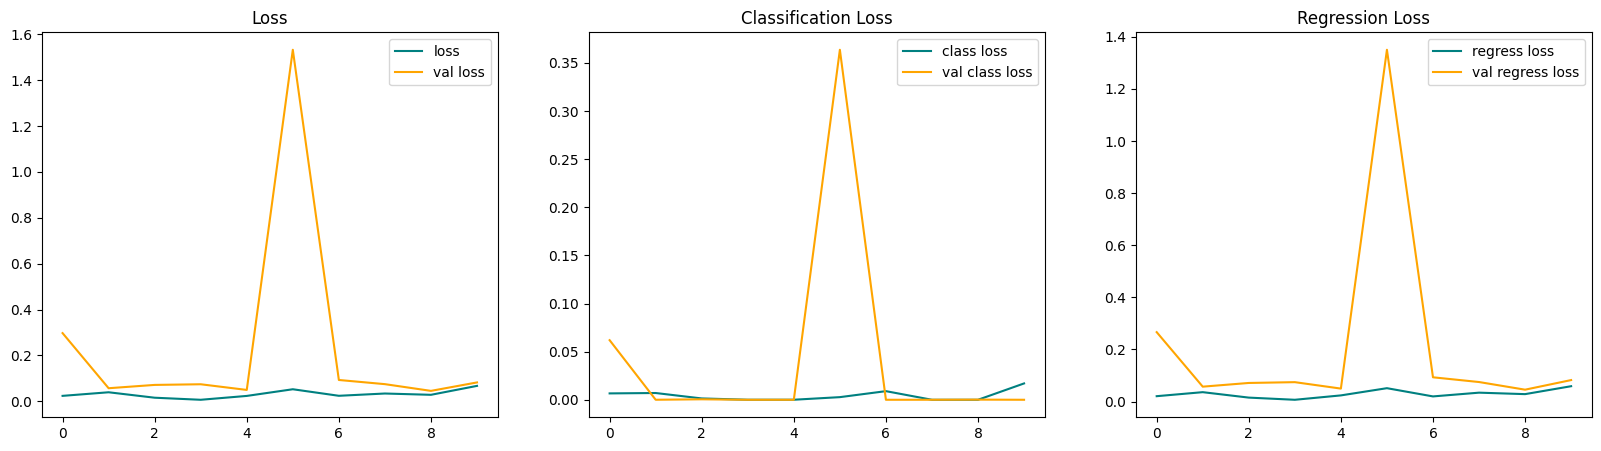

In [87]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [88]:
hist.history

{'total_loss': [0.02401069365441799,
  0.039638955146074295,
  0.01593141071498394,
  0.006934285629540682,
  0.02373097836971283,
  0.05278927832841873,
  0.024297136813402176,
  0.03422672674059868,
  0.028578637167811394,
  0.06748954951763153],
 'class_loss': [0.006623671390116215,
  0.007026378531008959,
  0.0013897864846512675,
  4.111673479201272e-05,
  4.530724254436791e-05,
  0.0027399940881878138,
  0.008960364386439323,
  7.97235406935215e-06,
  5.833919658471132e-06,
  0.01698320358991623],
 'regress_loss': [0.02069885842502117,
  0.03612576425075531,
  0.015236517414450645,
  0.0069137271493673325,
  0.023708324879407883,
  0.05141928046941757,
  0.01981695368885994,
  0.034222740679979324,
  0.028575720265507698,
  0.058997951447963715],
 'val_total_loss': [0.297415554523468,
  0.05727840214967728,
  0.0717109963297844,
  0.07453537732362747,
  0.04983629286289215,
  1.5319384336471558,
  0.0931944027543068,
  0.07501722872257233,
  0.04572777822613716,
  0.08252296596765

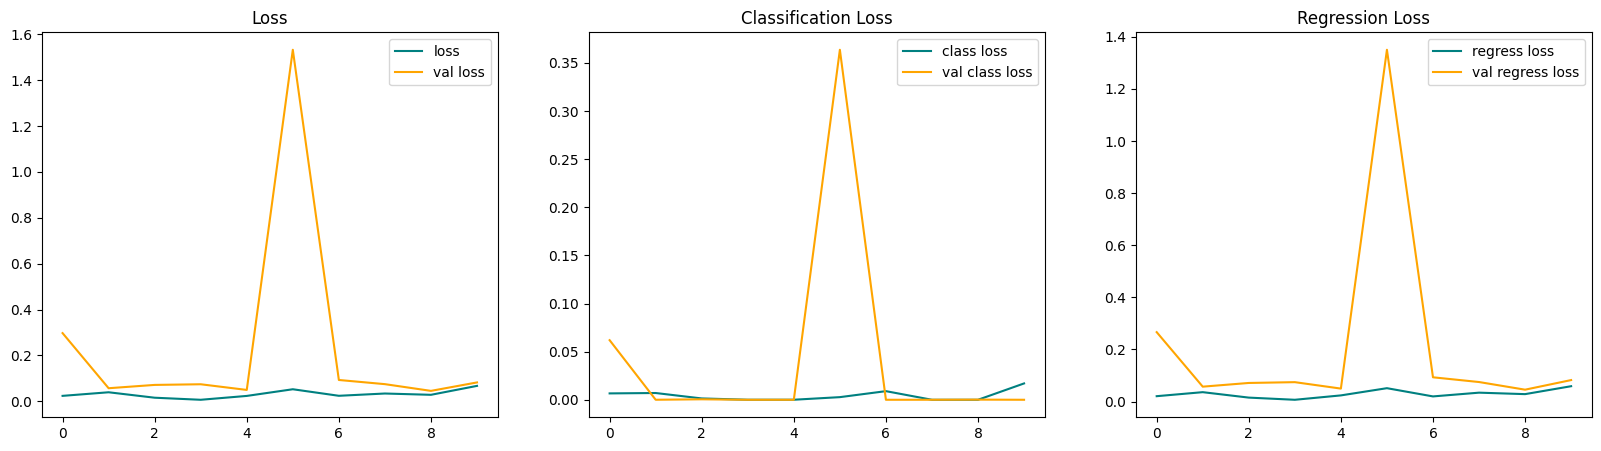

In [89]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [90]:
test_data = test.as_numpy_iterator()

In [91]:
test_sample = test_data.next()

In [92]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


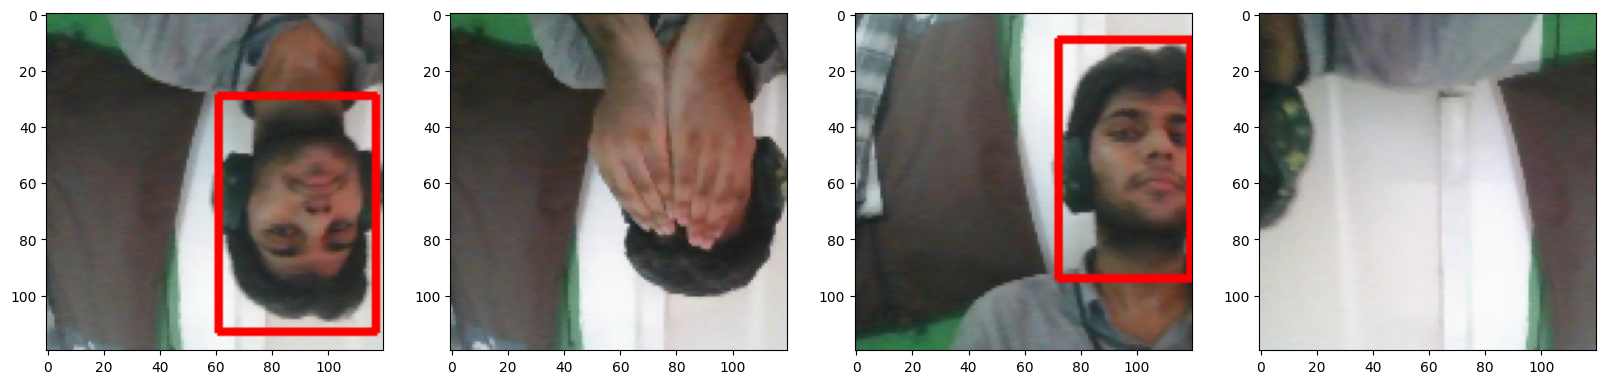

In [95]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        # Create a writable copy of the image
        sample_image_copy = sample_image.copy()
        
        # Draw the rectangle on the copy
        cv2.rectangle(sample_image_copy, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                      (255,0,0), 2)
        
        # Display the image with the rectangle
        ax[idx].imshow(sample_image_copy)
    else:
        # Display the original image without modifications
        ax[idx].imshow(sample_image)


In [96]:
from tensorflow.keras.models import load_model

In [97]:
facetracker.save('facetracker.h5')

D:\python\face detection\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
facetracker = load_model('facetracker.h5')

In [7]:
import cv2
import numpy as np
import tensorflow as tf
import time

# Load the pre-trained model
facetracker = tf.keras.models.load_model('facetracker.h5')

# Capture video from webcam
cap = cv2.VideoCapture(0)

# Define frame processing interval
frame_interval = 0.1  # 0.1 seconds between frames
last_processed_time = time.time()

while cap.isOpened():
    _, frame = cap.read()
    frame = frame[50:500, 50:500, :]
    
    # Get current time
    current_time = time.time()
    
    # Process frame only if enough time has passed
    if current_time - last_processed_time >= frame_interval:
        last_processed_time = current_time
        
        # Convert to RGB
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (120, 120))
        
        # Normalize and expand dimensions for prediction
        resized_norm = np.expand_dims(resized / 255.0, axis=0)
        
        # Predict using the model
        yhat = facetracker.predict(resized_norm)
        sample_coords = yhat[1][0]
        
        # Draw rectangle and label if confidence is high enough
        if yhat[0][0] > 0.5:
            # Main rectangle
            cv2.rectangle(frame, 
                          tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                          tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)), 
                          (255, 0, 0), 2)
            # Label rectangle
            cv2.rectangle(frame, 
                          tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -30])),
                          tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [80, 0])), 
                          (255, 0, 0), -1)
            # Text
            cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -5])),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Display the frame
    cv2.imshow('EyeTrack', frame)
    
    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 78ms/step


KeyboardInterrupt: 